In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from lightgbm import plot_importance
import matplotlib.pyplot as plt
import koreanize_matplotlib
from matplotlib.ticker import MaxNLocator
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
import sklearn
import numpy as np
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
plt.rc('font', family='Malgun Gothic')

C:\Users\big-03-06\AppData\Local\Temp\ipykernel_1960\750111916.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab20', len(df))


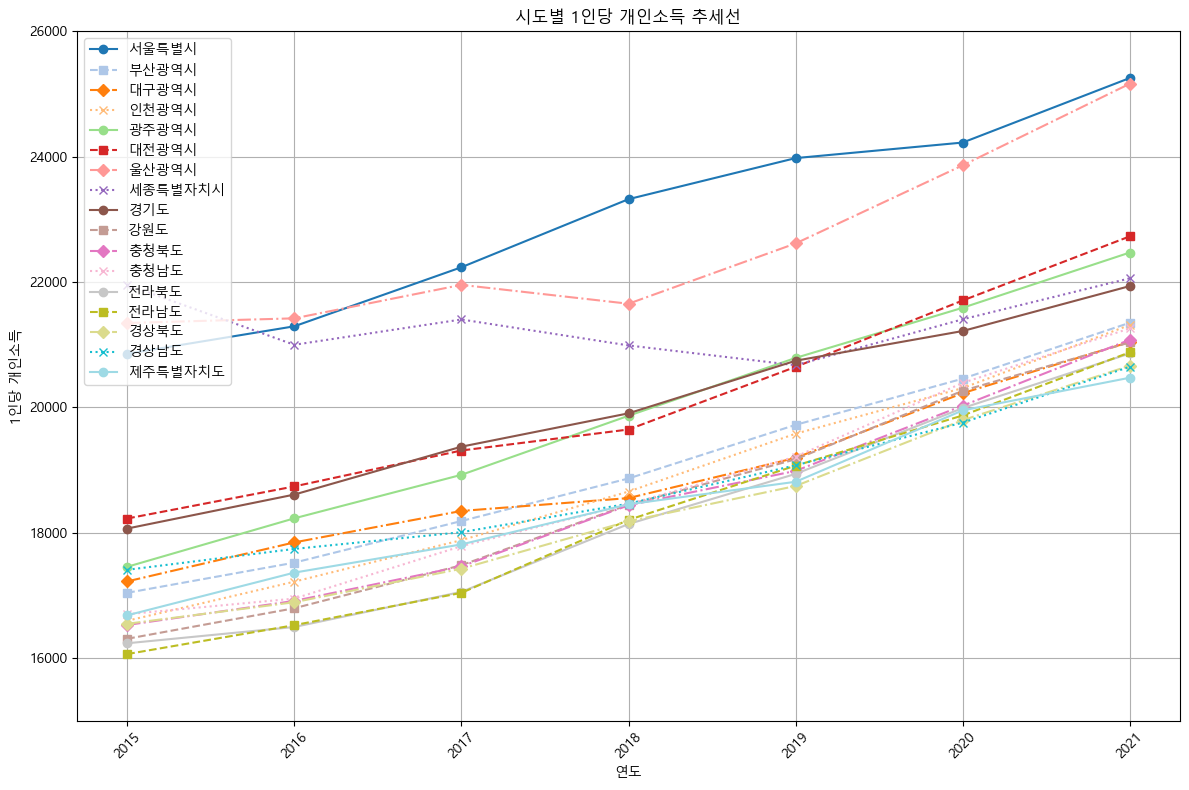

In [2]:
data = {
    '시도별': ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도'],
    '2015': [20857, 17044, 17226, 16598, 17459, 18229, 21348, 21957, 18069, 16311, 16531, 16703, 16239, 16067, 16550, 17411, 16685],
    '2016': [21295, 17525, 17848, 17222, 18232, 18741, 21422, 21000, 18611, 16798, 16915, 16952, 16499, 16528, 16894, 17744, 17366],
    '2017': [22237, 18189, 18350, 17884, 18926, 19314, 21956, 21404, 19375, 17484, 17465, 17788, 17059, 17043, 17428, 18011, 17816],
    '2018': [23323, 18868, 18555, 18659, 19868, 19649, 21655, 20990, 19907, 18450, 18440, 18458, 18141, 18207, 18185, 18466, 18456],
    '2019': [23978, 19723, 19196, 19582, 20791, 20648, 22617, 20674, 20746, 19174, 18989, 19216, 18941, 19072, 18748, 19078, 18815],
    '2020': [24226, 20460, 20229, 20310, 21591, 21707, 23863, 21407, 21220, 20267, 20029, 20393, 19991, 19873, 19798, 19759, 19954],
    '2021': [25256, 21352, 21046, 21317, 22472, 22730, 25165, 22061, 21937, 21038, 21081, 21262, 20862, 20881, 20667, 20650, 20475]
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 8))

# 시도별 1인당 개인소득 추세선 그리기
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', 'x']
color_palette = plt.cm.get_cmap('tab20', len(df))

for idx, row in df.iterrows():
    line_style = line_styles[idx % len(line_styles)]
    marker = markers[idx % len(markers)]
    plt.plot(df.columns[1:], row[1:], marker=marker, label=row['시도별'], linestyle=line_style, color=color_palette(idx))

plt.title('시도별 1인당 개인소득 추세선')
plt.xlabel('연도')
plt.ylabel('1인당 개인소득')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.ylim(15000, 26000)

plt.tight_layout()
plt.show()


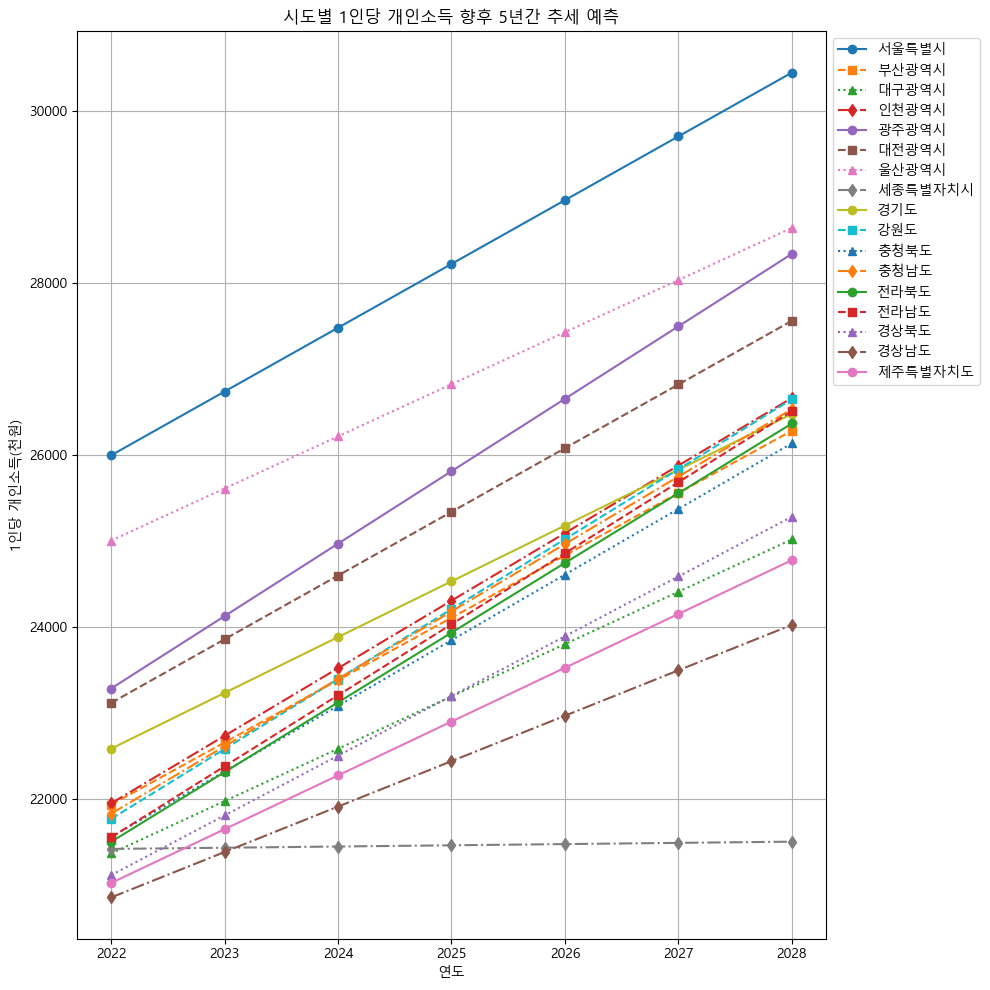

In [4]:
data = {
    '시도별': ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도'],
    '2015': [20857, 17044, 17226, 16598, 17459, 18229, 21348, 21957, 18069, 16311, 16531, 16703, 16239, 16067, 16550, 17411, 16685],
    '2016': [21295, 17525, 17848, 17222, 18232, 18741, 21422, 21000, 18611, 16798, 16915, 16952, 16499, 16528, 16894, 17744, 17366],
    '2017': [22237, 18189, 18350, 17884, 18926, 19314, 21956, 21404, 19375, 17484, 17465, 17788, 17059, 17043, 17428, 18011, 17816],
    '2018': [23323, 18868, 18555, 18659, 19868, 19649, 21655, 20990, 19907, 18450, 18440, 18458, 18141, 18207, 18185, 18466, 18456],
    '2019': [23978, 19723, 19196, 19582, 20791, 20648, 22617, 20674, 20746, 19174, 18989, 19216, 18941, 19072, 18748, 19078, 18815],
    '2020': [24226, 20460, 20229, 20310, 21591, 21707, 23863, 21407, 21220, 20267, 20029, 20393, 19991, 19873, 19798, 19759, 19954],
    '2021': [25256, 21352, 21046, 21317, 22472, 22730, 25165, 22061, 21937, 21038, 21081, 21262, 20862, 20881, 20667, 20650, 20475]
}

# 데이터프레임 생성
df1 = pd.DataFrame(data)

# Linear Regression 모델 초기화
model = LinearRegression()

# 각 시도별로 추세선 예측 및 출력하기
plt.figure(figsize=(10, 10))
styles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'd']

for idx, row in df1.iterrows():
    years = np.array(list(map(int, df1.columns[1:]))).reshape(-1, 1)
    income = row[1:]
    model.fit(years, income)
    
    # 2022년부터 2028년까지의 추세 예측
    future_years = np.array(range(2022, 2029)).reshape(-1, 1)
    future_income = model.predict(future_years)
    
    # 예측 결과 추세선 그래프로 그리기 (각 시도별 다른 색상 사용)
    plt.plot(future_years, future_income, linestyle=styles[idx % len(styles)], marker=markers[idx % len(markers)], label=f'{row["시도별"]}')
    
    
plt.title('시도별 1인당 개인소득 향후 5년간 추세 예측')
plt.xlabel('연도')
plt.ylabel('1인당 개인소득(천원)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(2022, 2029))  # 연도 범위 설정
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # x축 눈금을 정수로 설정
plt.grid(True)
plt.tight_layout()

plt.show()
